In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('/content/chronic_kidney_disease.csv')


In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df["age"]=df["age"].fillna(df["age"].median())

In [ ]:
df["sg"]=df["sg"].fillna(df["sg"].median())
df["al"]=df["al"].fillna(df["al"].median())
df["bp"]=df["bp"].fillna(df["bp"].median())

In [ ]:
numerical=[]
for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
print(numerical)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


In [ ]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df.duplicated().value_counts() # checking for duuplicates

False    400
dtype: int64

In [ ]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
df["classification"]=df["classification"].replace("ckd\t","ckd",regex=True)

In [ ]:
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

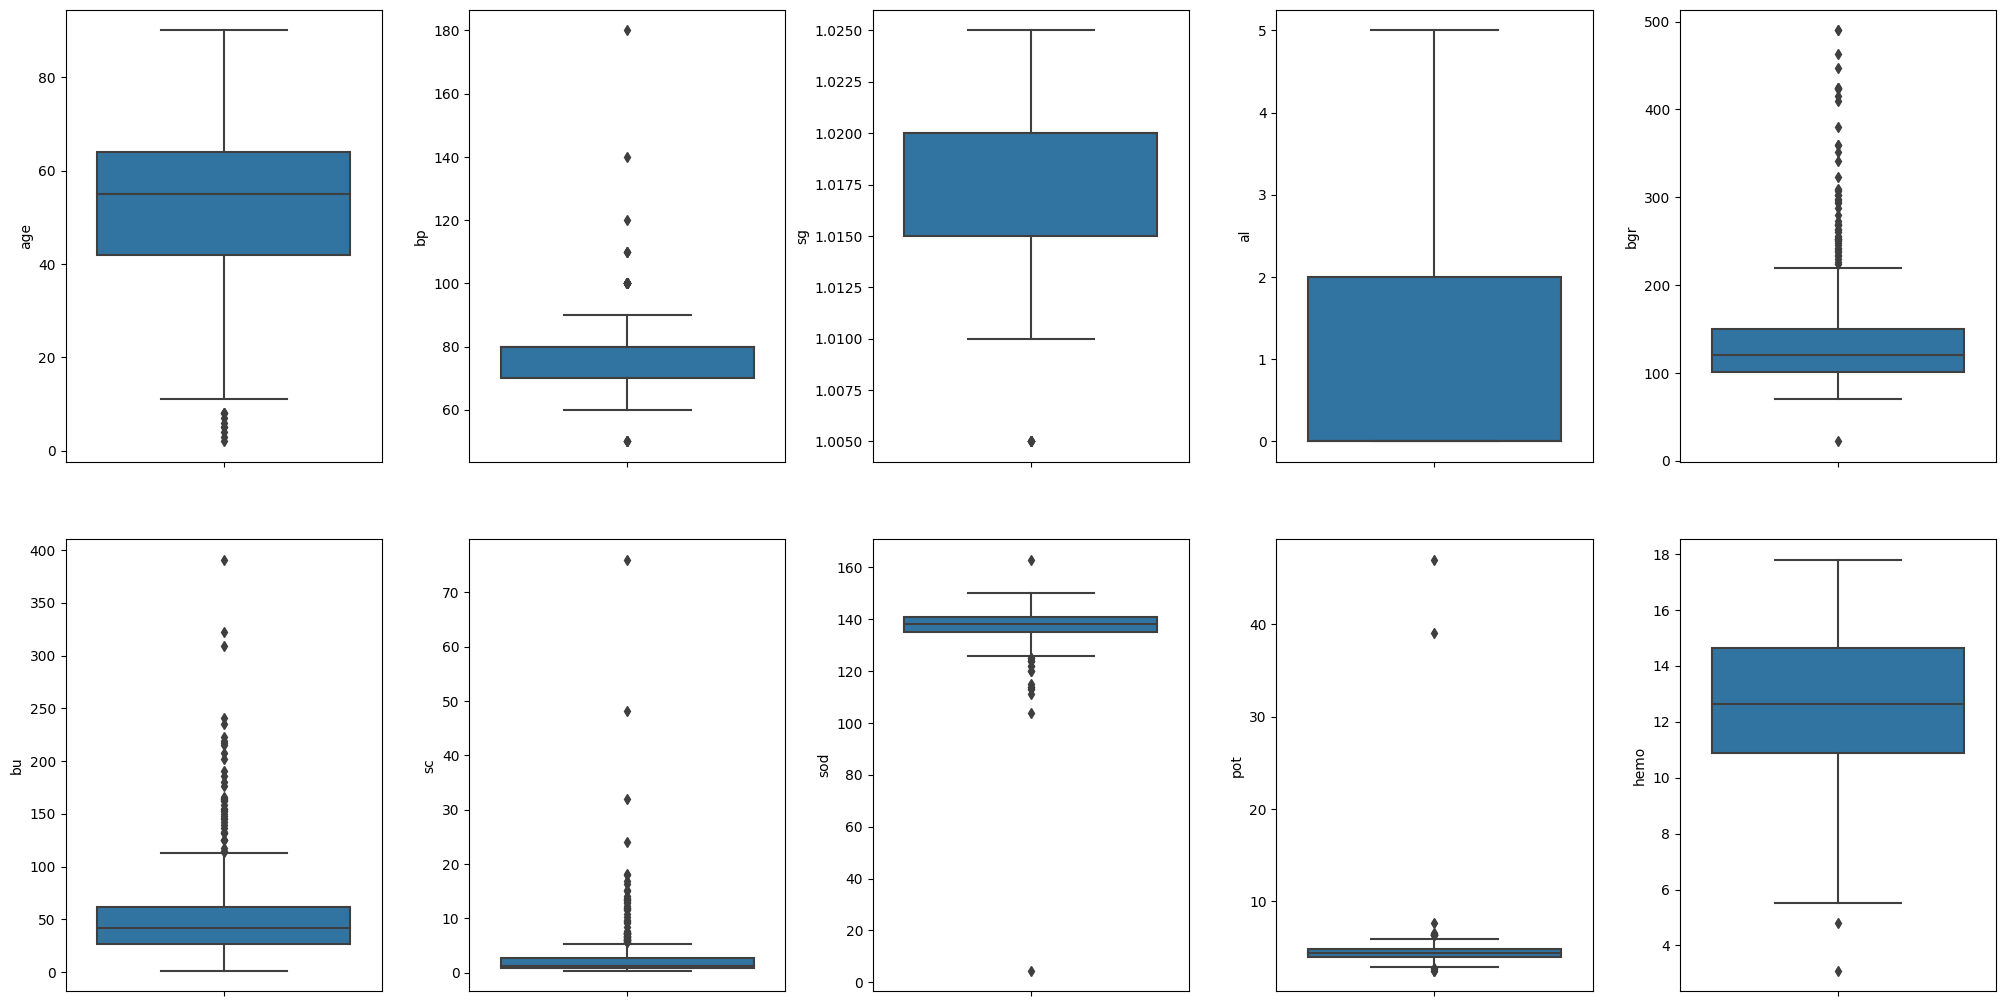

In [ ]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
hg=df[['age','bp','sg','al','bgr','bu','sc','sod','pot','hemo']]
index=0
ax=ax.flatten()
for col,value in hg.items():
  sns.boxplot(y=col,data=hg,ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

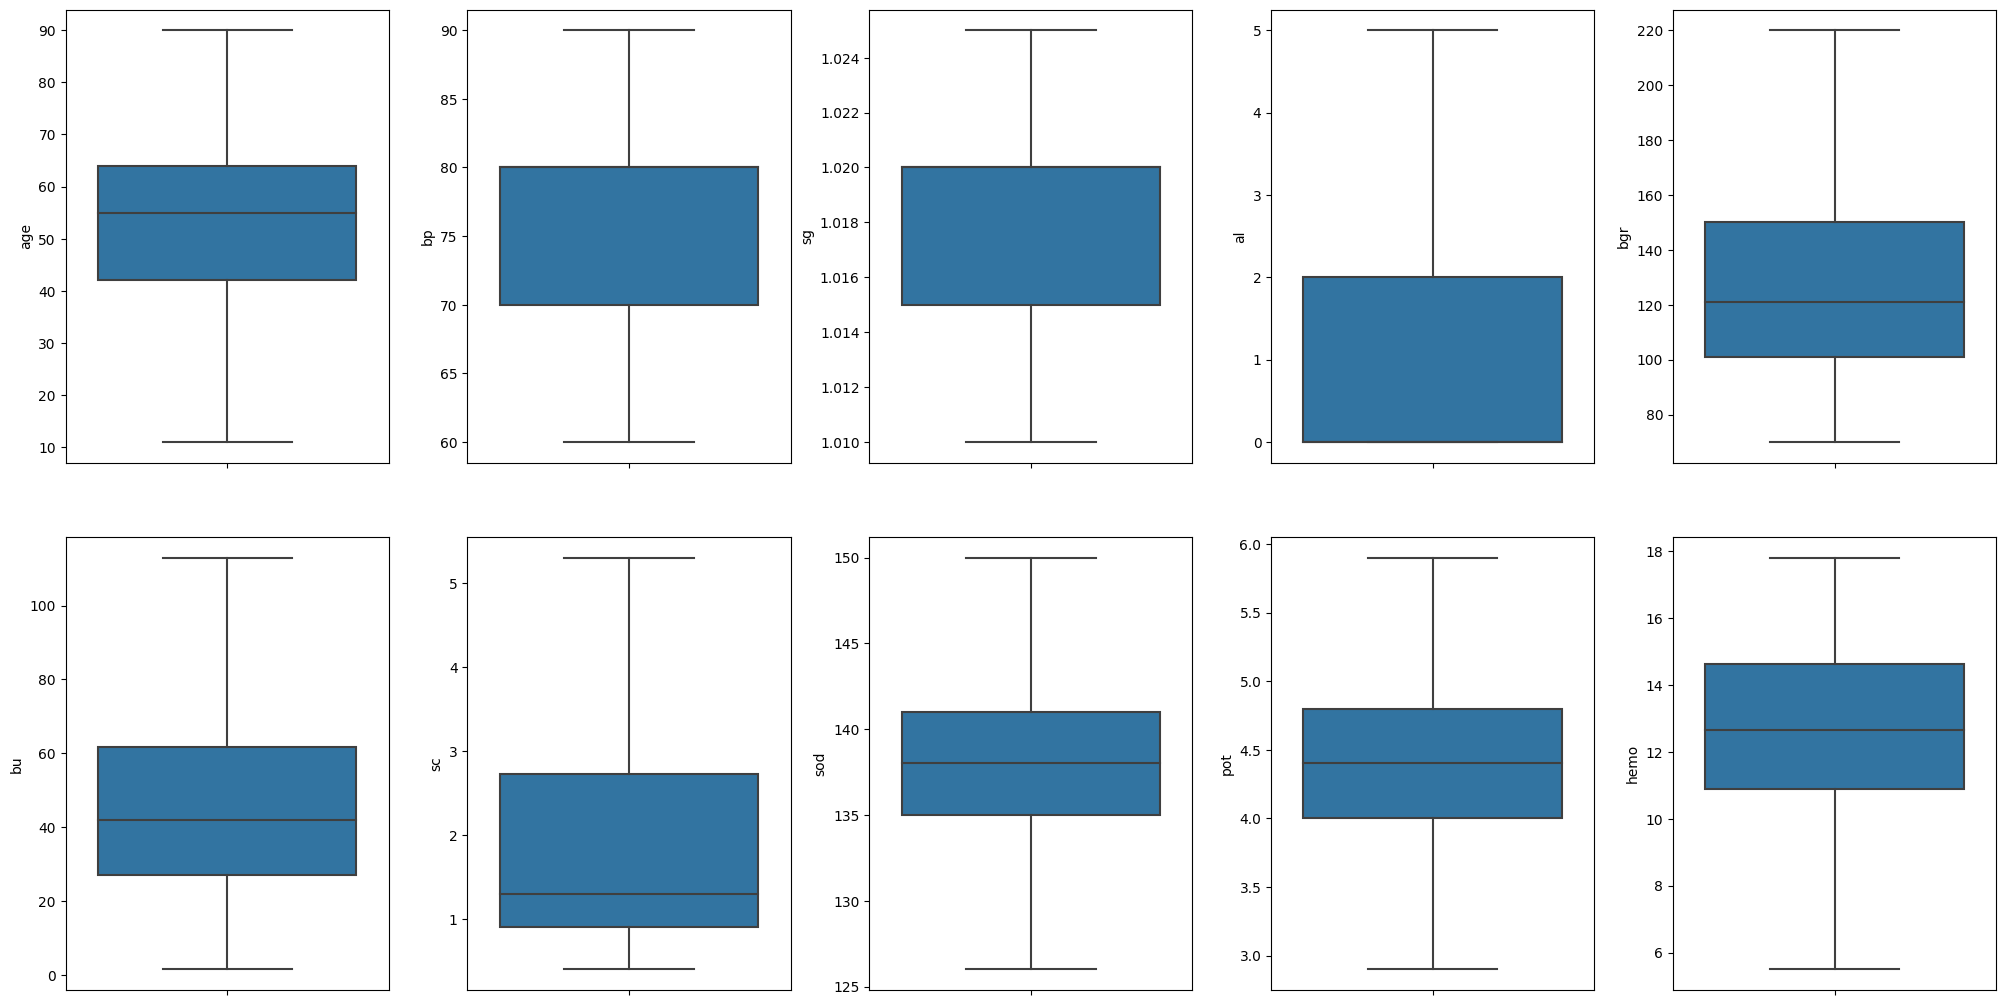

In [ ]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in hg.items():
  sns.boxplot(y=col,data=hg,ax=ax[index],showfliers=False)
  index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

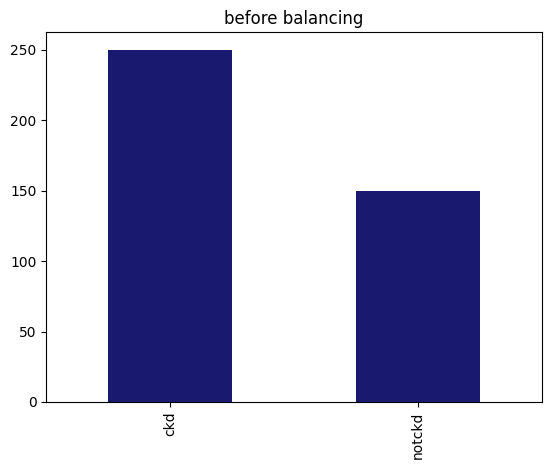

In [ ]:
df['classification'].value_counts().plot.bar(color='midnightblue')
plt.title('before balancing');

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Separate features and target variable
X = df.drop(columns=['classification'])
y = df['classification']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

ckd       250
notckd    250
Name: classification, dtype: int64


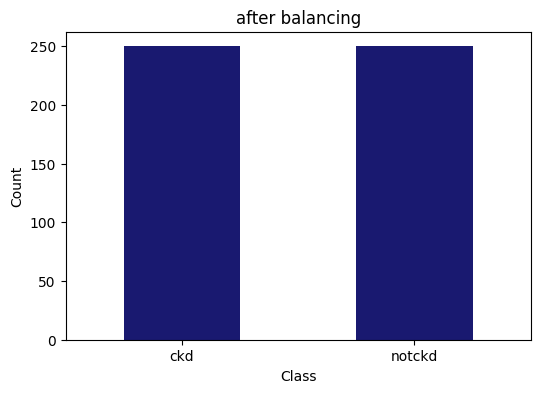

In [ ]:
 #Load the balanced dataset (X_resampled and y_resampled are obtained from oversampling)
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='classification')], axis=1)

# Check the distribution of the target variable in the balanced dataset
class_distribution = balanced_data['classification'].value_counts()

# Plotting the class distribution for the balanced dataset
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='midnightblue')
plt.title('after balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                  int64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [ ]:
df


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,1


In [ ]:
df=df.drop(columns=['id'])

In [ ]:
X = df.drop(columns=['classification'])
y = df['classification']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=40)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=40)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 98.33%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.96      1.00      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_result = confusion_matrix(y_test,y_pred)

# Display the confusion matrix
print("Confusion Matrix (Testing Data):")
print(confusion_matrix_result)

Confusion Matrix (Testing Data):
[[75  2]
 [ 0 43]]


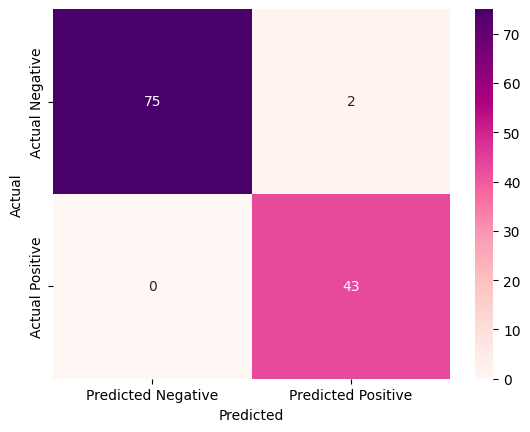

[[75  2]
 [ 0 43]]


In [ ]:
true_labels=y_test
predicted_labels=y_pred
confusion=confusion_matrix(true_labels,predicted_labels)
sns.heatmap(confusion, annot=True, fmt="d", cmap="RdPu", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(confusion)

In [ ]:
res=[[71,60,1.015,4,0,0,0,0,0,118,125,5.3,136,4.9,11.4,35,15200,4.3,0,0,1.98,0,0,1]]
ans=rf_classifier.predict(res)
if ans==0:
  print("The model predicts that the individual has ckd")
else:
  print("The model predicts that the individual has nockd")

The model predicts that the individual has ckd


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
res=[[32.00,70,1.025,0,0,1.89,1,0,0,100,29,1.1,142,4.5,14.3,43,6700,5.9,0,0,0,0,0,0]]
ans=rf_classifier.predict(res)
if ans==0:
  print("The model predicts that the individual has ckd")
else:
  print("The model predicts that the individual has nockd")

The model predicts that the individual has nockd


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
